# **Cab Trip Analysis**

# **Introduction**

In this project we are aiming to analyze cab trip dataset.

Mainly considering the relationship of different fields on tip.

Impact of long-distance trips on revenue.

Tips by Location

Tips by payment method

# **Project flow**
# Data Loading and Exploration

# Load the dataset.
Explore data types, dimensions, and descriptive statistics.
Data Cleaning

# Handle missing values.
Convert data types (e.g., timestamps to datetime, categorical encoding).
Remove or handle duplicates if any.

# Feature Engineering
Create new features (e.g., trip duration from timestamps, time of day, day of the week).
Encode categorical variables for analysis.
Normalize or scale numerical features if necessary.
Exploratory Data Analysis (EDA)

#Visualization
Visualize relationships between tips and other variables using correlation, scatter plots, or bar charts.
Investigate patterns and trends (e.g., tips by Location, payment type, or trip distance).

#Modeling
Applied Prediction model

#Insights
Insights of dataset

# **LIBRARIES**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/txi.csv'

data = pd.read_csv(file_path)

data.head()


Mounted at /content/drive


,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,643ffbf31141d9399b7bc9f198c4f6e84756d9e7,4f78222d267c08ee7267810e5f3f2241dc61bf1396d036...,10/15/2013 09:30:00 AM,10/15/2013 09:30:00 AM,480.0,1.00,1.703132e+10,1.703128e+10,32.0,28.0,...,0.0,6.45,Cash,NaN,41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),41.879255,-87.642649,POINT (-87.642648998 41.8792550844)
1,b9ae2ac1e915d97b476dc630b881dc3f7032c758,d0635c2ca37f9c14eefc1fc949c5712ecfece72d50eaa9...,10/18/2013 04:15:00 PM,10/18/2013 04:30:00 PM,900.0,2.70,1.703107e+10,1.703108e+10,7.0,8.0,...,0.0,11.90,Credit Card,NaN,41.929078,-87.646293,POINT (-87.6462934762 41.9290776551),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)
2,4d53c0bbab56ddb4746bb7b0d1b25b51bf83327a,271cde2c4b4cc7b38a86c7e9b1543474230949e7fa5925...,11/07/2013 12:00:00 AM,11/07/2013 12:00:00 AM,0.0,1.10,1.703107e+10,1.703128e+10,7.0,28.0,...,0.0,5.25,Cash,NaN,41.921778,-87.651062,POINT (-87.6510618838 41.9217781876),41.885300,-87.642808,POINT (-87.6428084655 41.8853000224)
3,35a5cbe230bea49c195d6d350fa9b6cd5d6a93f1,b02980a1f1cf5e8f64e56a911bd2bc7e0fb733bf6e465f...,10/19/2013 07:30:00 PM,10/19/2013 07:45:00 PM,840.0,4.51,1.703108e+10,NaN,8.0,NaN,...,1.0,13.65,Cash,NaN,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),NaN,NaN,NaN
4,45f136511499169c5b8cb14ed50bdb0b0deb86b9,ca30b49aab641fe71294a9b03b991b968c7f3e47e11691...,10/31/2013 05:45:00 PM,10/31/2013 06:00:00 PM,1020.0,2.30,1.703184e+10,NaN,32.0,NaN,...,0.0,10.45,Cash,NaN,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),NaN,NaN,NaN


# **DATA INFO**

In [3]:
data.shape

(7375639, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7375639 entries, 0 to 7375638
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip ID                     object 
 1   Taxi ID                     object 
 2   Trip Start Timestamp        object 
 3   Trip End Timestamp          object 
 4   Trip Seconds                float64
 5   Trip Miles                  float64
 6   Pickup Census Tract         float64
 7   Dropoff Census Tract        float64
 8   Pickup Community Area       float64
 9   Dropoff Community Area      float64
 10  Fare                        float64
 11  Tips                        float64
 12  Tolls                       float64
 13  Extras                      float64
 14  Trip Total                  float64
 15  Payment Type                object 
 16  Company                     object 
 17  Pickup Centroid Latitude    float64
 18  Pickup Centroid Longitude   float64
 19  Pickup Centroid Locat

In [5]:
# Count total NaN values in the entire dataset
total_nan = data.isna().sum().sum()
print(f"Total NaN values in the dataset: {total_nan}")

nan_per_column = data.isna().sum()
print("NaN values per column:")
print(nan_per_column)


Total NaN values in the dataset: 12702908
NaN values per column:
Trip ID                             0
Taxi ID                             3
Trip Start Timestamp                1
Trip End Timestamp                  1
Trip Seconds                     1502
Trip Miles                          1
Pickup Census Tract           1727931
Dropoff Census Tract          1784830
Pickup Community Area          137361
Dropoff Community Area         328908
Fare                               42
Tips                               42
Tolls                          144565
Extras                             42
Trip Total                         42
Payment Type                        1
Company                       7226463
Pickup Centroid Latitude       137007
Pickup Centroid Longitude      137007
Pickup Centroid Location       137007
Dropoff Centroid Latitude      313384
Dropoff Centroid Longitude     313384
Dropoff Centroid  Location     313384
dtype: int64


# **DATA PRE-PROCESSING**

In [6]:
 df2 = data.drop(columns=['Company','Trip ID','Taxi ID'])
 df2 = df2.dropna()


# Convert 'Trip Start Timestamp' and 'Trip End Timestamp' to datetime
df2['Trip Start Timestamp'] = pd.to_datetime(df2['Trip Start Timestamp'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df2['Trip End Timestamp'] = pd.to_datetime(df2['Trip End Timestamp'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Extract Date and Time for 'Trip Start Timestamp'
df2['Trip Start Date'] = df2['Trip Start Timestamp'].dt.date  # Date as YYYY-MM-DD
df2['Trip Start Time'] = df2['Trip Start Timestamp'].dt.hour + df2['Trip Start Timestamp'].dt.minute / 60  # Time as float

# Extract Date and Time for 'Trip End Timestamp'
df2['Trip End Date'] = df2['Trip End Timestamp'].dt.date  # Date as YYYY-MM-DD
df2['Trip End Time'] = df2['Trip End Timestamp'].dt.hour + df2['Trip End Timestamp'].dt.minute / 60  # Time as float

# Create 'Is Weekday' and 'Is Weekend' for Trip Start
df2['Is Weekday'] = df2['Trip Start Timestamp'].dt.dayofweek < 5  # True if Monday-Friday
df2['Is Weekend'] = df2['Trip Start Timestamp'].dt.dayofweek >= 5  # True if Saturday-Sunday

# Drop the original timestamp columns if no longer needed
df2.drop(['Trip Start Timestamp', 'Trip End Timestamp'], axis=1, inplace=True)


In [7]:
df3=df2

df3['Avg Speed (mph)'] = (df3['Trip Miles'] / (df3['Trip Seconds'] / 3600)).fillna(0)

df3['Payment Type'] = df3['Payment Type'].str.strip()

# Create binary columns for 'Cash' and 'Credit Card'
df3['Cash'] = df3['Payment Type'].apply(lambda x: 1 if x == 'Cash' else 0)
df3['Credit Card'] = df3['Payment Type'].apply(lambda x: 1 if x == 'Credit Card' else 0)

# Drop the original 'Payment Type' column
df4 = df3.drop(columns=['Payment Type'])



In [20]:
df5 = df4.drop(columns=['Dropoff Centroid  Location','Pickup Centroid Location','Trip Start Date', 'Trip End Date'])
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5561555 entries, 0 to 7375636
Data columns (total 22 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip Seconds                float64
 1   Trip Miles                  float64
 2   Pickup Census Tract         float64
 3   Dropoff Census Tract        float64
 4   Pickup Community Area       float64
 5   Dropoff Community Area      float64
 6   Fare                        float64
 7   Tips                        float64
 8   Tolls                       float64
 9   Extras                      float64
 10  Trip Total                  float64
 11  Pickup Centroid Latitude    float64
 12  Pickup Centroid Longitude   float64
 13  Dropoff Centroid Latitude   float64
 14  Dropoff Centroid Longitude  float64
 15  Trip Start Time             float64
 16  Trip End Time               float64
 17  Is Weekday                  bool   
 18  Is Weekend                  bool   
 19  Avg Speed (mph)           

In [27]:
# Create a binary column: 1 for tips > 0, 0 for no tips
df5['Tip Given'] = (df5['Tips'] > 0).astype(int)

# **VISUALIZATION**

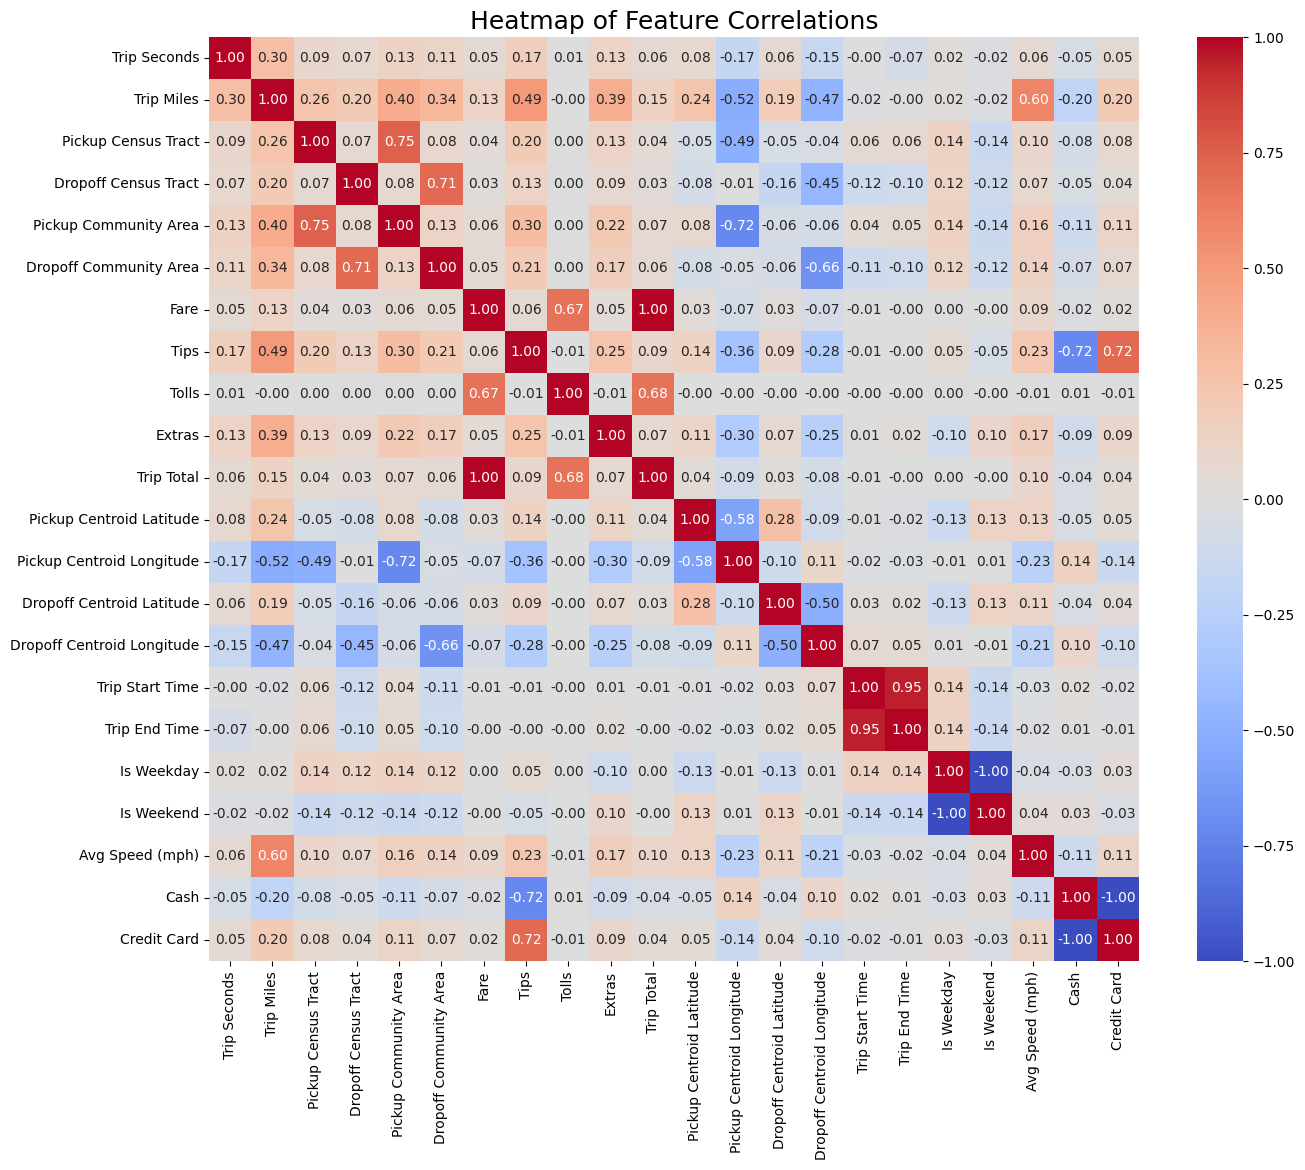

In [9]:
correlation_matrix = df5.corr()

plt.figure(figsize=(15, 12))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Heatmap of Feature Correlations", fontsize=18)

plt.show()


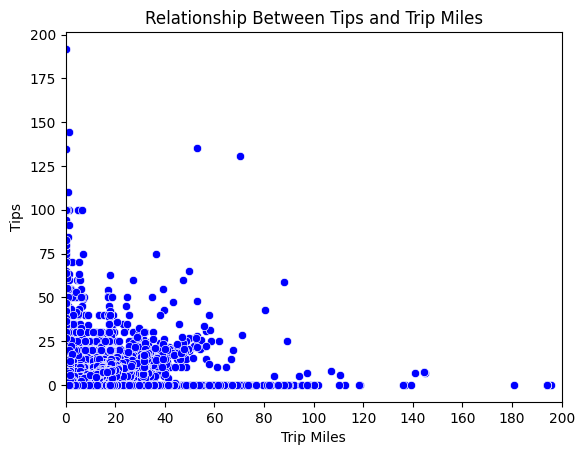

In [10]:
# Plotting the scatter plot
sns.scatterplot(x='Trip Miles', y='Tips', data=df5, color='blue')

plt.title('Relationship Between Tips and Trip Miles')
plt.xlabel('Trip Miles')
plt.ylabel('Tips')

plt.xlim(0, 200)
plt.xticks(range(0, 201, 20))

plt.show()


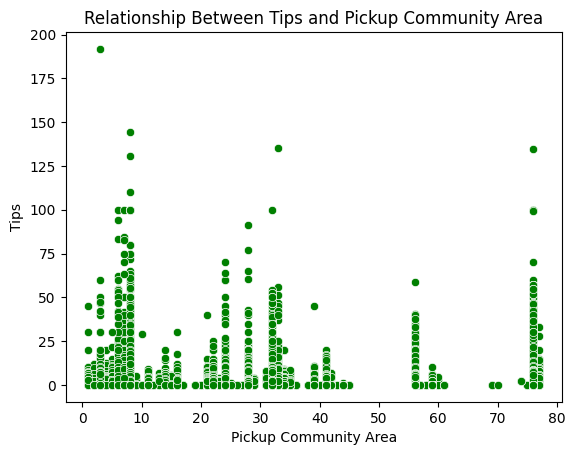

In [11]:
#Relationship Between Tips and Pickup Community Area

sns.scatterplot(x='Pickup Community Area', y='Tips', data=df5, color='green')
plt.title('Relationship Between Tips and Pickup Community Area')
plt.xlabel('Pickup Community Area')
plt.ylabel('Tips')
plt.show()


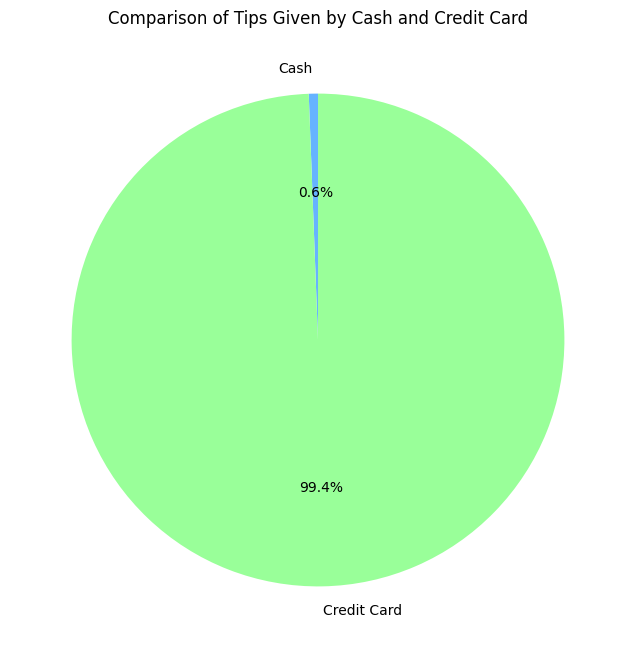

In [12]:

# Calculate the total tips for cash and credit card payments
cash_tips = df5[df5['Cash'] == 1]['Tips'].sum()
credit_card_tips = df5[df5['Credit Card'] == 1]['Tips'].sum()

payment_methods = ['Cash', 'Credit Card']
total_tips = [cash_tips, credit_card_tips]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_tips, labels=payment_methods, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Comparison of Tips Given by Cash and Credit Card')
plt.show()


# **MODEL**

In [26]:
#Logistic Regression

X = df5[['Trip Miles', 'Pickup Community Area', 'Credit Card']]
y = df5['Tip Given']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(class_weight='balanced', random_state=42)  # Class weight = 'balanced' helps with imbalanced data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities (optional)

#Accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

print("Feature Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Accuracy: 0.9823062075264921
Confusion Matrix:
 [[769896  17821]
 [  1860 322734]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    787717
           1       0.95      0.99      0.97    324594

    accuracy                           0.98   1112311
   macro avg       0.97      0.99      0.98   1112311
weighted avg       0.98      0.98      0.98   1112311

Feature Coefficients: [[ 5.11358919e-02 -4.13001127e-03  8.85514756e+00]]
Intercept: [-5.18123048]


In [25]:
#Random Forest

X = df5[['Trip Miles', 'Pickup Community Area', 'Credit Card']]
y = df5['Tip Given']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)

class_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", class_report_rf)

print("Random Forest Feature Importances:", model_rf.feature_importances_)


Random Forest Accuracy: 0.9821893337384958
Random Forest Confusion Matrix:
 [[769795  17922]
 [  1889 322705]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    787717
           1       0.95      0.99      0.97    324594

    accuracy                           0.98   1112311
   macro avg       0.97      0.99      0.98   1112311
weighted avg       0.98      0.98      0.98   1112311

Random Forest Feature Importances: [0.02667801 0.00847857 0.96484342]


# **INSIGHTS**

**Most Tip Given by community area Locations**

        1: Rogers Park
        2: West Ridge
        3: Lincoln Square
        4: North Center
        5: Lake View
        6: Lincoln Park
        7: Near North Side
        8: Belmont Cragin
        9: Avondale
        10:Chicago Lawn

**# Most tips by Trip distance**

As per data Most tips were given between 0 to 60 miles


**# Tips by Payment method**

As per data 99.4% tips are given by credit card